In [ ]:
import random
import time
import copy
from memory_profiler import memory_usage
import pandas as pd
import numpy
import csv
import matplotlib.pyplot as plt

In [ ]:
# Set the seed
random.seed(42)

In [ ]:
# Quick Sort with randomized pivot selection
def partition(arr, s, e, pi):
    arr[pi], arr[e] = arr[e], arr[pi]
    p = s
    for i in range(s, e):
        if arr[i] <= arr[e]:
            arr[i], arr[p] = arr[p], arr[i]
            p += 1
    arr[p], arr[e] = arr[e], arr[p]
    return p

def quickSort(arr, s, e):
    if s >= e:
        return
    pi = random.randint(s, e)
    pi = partition(arr, s, e, pi)
    quickSort(arr, s, pi - 1)
    quickSort(arr, pi + 1, e)

In [ ]:
# Heap Sort
def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    # See if left child of root exists and is greater than root
    if left < n and arr[i] < arr[left]:
        largest = left

    # See if right child of root exists and is greater than root
    if right < n and arr[largest] < arr[right]:
        largest = right

    # Change root, if needed
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap

        # Heapify the root.
        heapify(arr, n, largest)

def buildMaxHeap(arr):
    n = len(arr)

    # Start from the last parent node and sift down each node to build the heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

def heapSort(arr):
    n = len(arr)
    buildMaxHeap(arr)

    # One by one extract elements
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # swap
        heapify(arr, i, 0)

In [ ]:
# Count Sort
def countSort(arr):
    if not arr:
        return

    mn, mx = min(arr), max(arr)
    range_val = mx - mn + 1
    count = [0] * range_val
    output = [0] * len(arr)

    for x in arr:
        count[x - mn] += 1

    for i in range(1, range_val):
        count[i] += count[i - 1]

    for i in range(len(arr) - 1, -1, -1):
        output[count[arr[i] - mn] - 1] = arr[i]
        count[arr[i] - mn] -= 1

    arr[:] = output

In [ ]:
# Radix Sort
def radixSort(arr):
    n = len(arr)
    maxElement = max(arr)
    exp = 1
    while maxElement // exp > 0:
        count = [0] * 10
        output = [0] * n

        for i in range(n):
            index = (arr[i] // exp) % 10
            count[index] += 1

        for i in range(1, 10):
            count[i] += count[i - 1]

        for i in range(n - 1, -1, -1):
            index = (arr[i] // exp) % 10
            output[count[index] - 1] = arr[i]
            count[index] -= 1

        arr[:] = output
        exp *= 10

In [ ]:
# Bucket Sort
def bucketSort(arr):
    if not arr or min(arr) == max(arr):
        return

    mn, mx = min(arr), max(arr)
    range_val = mx - mn + 1
    numberOfBuckets = 5
    buckets = [[] for _ in range(numberOfBuckets)]
    bucketSize = (range_val + numberOfBuckets - 1) // numberOfBuckets

    for x in arr:
        buckets[(x - mn) // bucketSize].append(x)

    arr.clear()
    for bucket in buckets:
        bucketSort(bucket)
        arr.extend(bucket)

In [ ]:
def generate_random_array(size):
    return [random.randint(0, size) for _ in range(size)]

In [ ]:
def track_execution_time(sort_function, array, *args):
    start_time = time.perf_counter()
    sort_function(array, *args)
    end_time = time.perf_counter()
    return end_time - start_time

In [ ]:
def track_memory_usage(sort_function, dataset, *args):
    mem_usage = memory_usage((sort_function, (dataset, *args)))
    return max(mem_usage) - min(mem_usage)

In [ ]:
def test_sorting_algorithms_performance(size, num_runs):
    # Generate the original dataset
    original_array = generate_random_array(size)

    # List of sorting algorithms
    sorting_functions = [quickSort, heapSort, countSort, radixSort, bucketSort]

    # Initialize arrays to store average times and memory usages
    average_times = []
    average_mem_usages = []

    # Test each sorting algorithm
    for sort_function in sorting_functions:
        total_time = 0
        total_mem_usage = 0
        for _ in range(num_runs):
            arr_copy_time = copy.deepcopy(original_array)
            arr_copy_mem = copy.deepcopy(original_array)

            # Calculate time
            if sort_function == quickSort:
                total_time += track_execution_time(sort_function, arr_copy_time, 0, len(arr_copy_time) - 1)
            else:
                total_time += track_execution_time(sort_function, arr_copy_time)

            # Calculate memory usage
            if sort_function == quickSort:
                total_mem_usage += track_memory_usage(sort_function, arr_copy_mem, 0, len(arr_copy_mem) - 1)
            else:
                total_mem_usage += track_memory_usage(sort_function, arr_copy_mem)

        # Calculate the average time and memory usage
        average_time = total_time / num_runs
        average_mem_usage = total_mem_usage / num_runs

        average_times.append(average_time)
        average_mem_usages.append(average_mem_usage)

    return average_times, average_mem_usages, original_array, arr_copy_mem

In [ ]:
def generate_datasets_and_test_performance(initial_size, num_datasets, num_runs):
    all_times = []
    all_memory_usages = []
    min_max_first_last = []

    for i in range(1, num_datasets + 1):
        size = initial_size * i
        average_times, average_memory_usages, originalArray, sortedArray = test_sorting_algorithms_performance(size, num_runs)
        min_max_first_last.append([min(originalArray), max(originalArray), sortedArray[0], sortedArray[-1]])
        all_times.append([size] + average_times)
        all_memory_usages.append([size] + average_memory_usages)

    return all_times, all_memory_usages, min_max_first_last

In [ ]:
def write_two_tables_to_csv(filename, table1, table1_columns, table1_name, table2, table2_columns, table2_name, separator_rows=2):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)

        # Write the name and header for table 1
        writer.writerow([table1_name])
        writer.writerow(table1_columns)
        writer.writerows(table1)

        # Write separator rows
        for _ in range(separator_rows):
            writer.writerow([])

        # Write the name and header for table 2
        writer.writerow([table2_name])
        writer.writerow(table2_columns)
        writer.writerows(table2)

In [ ]:
def merge_arrays(array1, array2):
    # Assuming both arrays have the same number of rows
    return [row1 + row2 for row1, row2 in zip(array1, array2)]

In [ ]:
def plot_graph(data, title, y_label, figsize=(20, 6), xticks=None, yticks=None, marker='o'):
    df = pd.DataFrame(data, columns=['Dataset Size', 'Quick Sort', 'Heap Sort', 'Count Sort', 'Radix Sort', 'Bucket Sort'])

    # Plotting with markers
    ax = df.plot(x='Dataset Size', kind='line', figsize=figsize, marker=marker)

    # Setting title and labels
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Dataset Size')

    # Setting custom x-ticks and y-ticks if provided
    if xticks is not None:
        plt.xticks(xticks)
    if yticks is not None:
        plt.yticks(yticks)

    # Customizing the grid
    ax.grid(True)
    plt.xticks(rotation=45)  # or any other angle that suits your data
    plt.legend()
    plt.show()

In [ ]:
def plot_dual_axis_graph(time_data, memory_data, title, figsize=(20, 8), xticks=None, yticks_left=None, yticks_right=None):
    df_time = pd.DataFrame(time_data, columns=['Dataset Size', 'Quick Sort', 'Heap Sort', 'Count Sort', 'Radix Sort', 'Bucket Sort'])
    df_memory = pd.DataFrame(memory_data, columns=['Dataset Size', 'Quick Sort', 'Heap Sort', 'Count Sort', 'Radix Sort', 'Bucket Sort'])

    fig, ax1 = plt.subplots(figsize=figsize)

    # Plotting execution time with solid lines and markers
    for column in df_time.columns[1:]:
        ax1.plot(df_time['Dataset Size'], df_time[column], marker='o', linestyle='-', label=column)

    ax1.set_xlabel('Dataset Size')
    ax1.set_ylabel('Execution Time (Seconds)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Customizing ticks and grid if provided
    if xticks is not None:
        ax1.set_xticks(xticks)
    if yticks_left is not None:
        ax1.set_yticks(yticks_left)

    ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
    ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

    # Creating a second y-axis for memory usage
    ax2 = ax1.twinx()

    # Plotting memory usage with dashed lines and different markers
    for column in df_memory.columns[1:]:
        ax2.plot(df_memory['Dataset Size'], df_memory[column], marker='x', linestyle='--', label=column)

    ax2.set_ylabel('Memory Usage (MB)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    if yticks_right is not None:
        ax2.set_yticks(yticks_right)

    # Adding title and adjusting legend positions
    plt.title(title)

    # Apply rotation here to the primary axis
    ax1.tick_params(axis='x', rotation=45)  # Rotating x-axis labels

    # Placing the left legend
    ax1_legend = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)

    # Manually adjust the right legend's position
    legend_offset = 0.18  # Adjust as needed
    ax2_legend = ax2.legend(loc='upper right', bbox_to_anchor=(1 + legend_offset, 1), borderaxespad=0.)

    # Tight layout to fit the external legend
    plt.tight_layout()

    # Adjust the figure to prevent cutting off legends or titles
    fig.subplots_adjust(right=0.85)  # Adjust this value as needed

    plt.show()

In [ ]:
# Get the performance data
size = 10000
datasets  = 30
run_times = 10
times, memory_usages, min_max_first_last = generate_datasets_and_test_performance(size, datasets, run_times)

In [ ]:
# Save Analysis Results to the csv file
column_names = ['Datasets Size', 'Quick Sort', 'Heap Sort', 'Count Sort', 'Radix Sort', 'Bucket Sort', 'Min', 'Max', 'First', 'Last']
filename = "Analysis.csv"
table1_name = "Exectution Time Results"
table2_name = "Memory Usage Results"
table_1 = merge_arrays(times, min_max_first_last)
table_2 = merge_arrays(memory_usages, min_max_first_last)
write_two_tables_to_csv(filename, table_1, column_names,table1_name, table_2, column_names, table2_name)

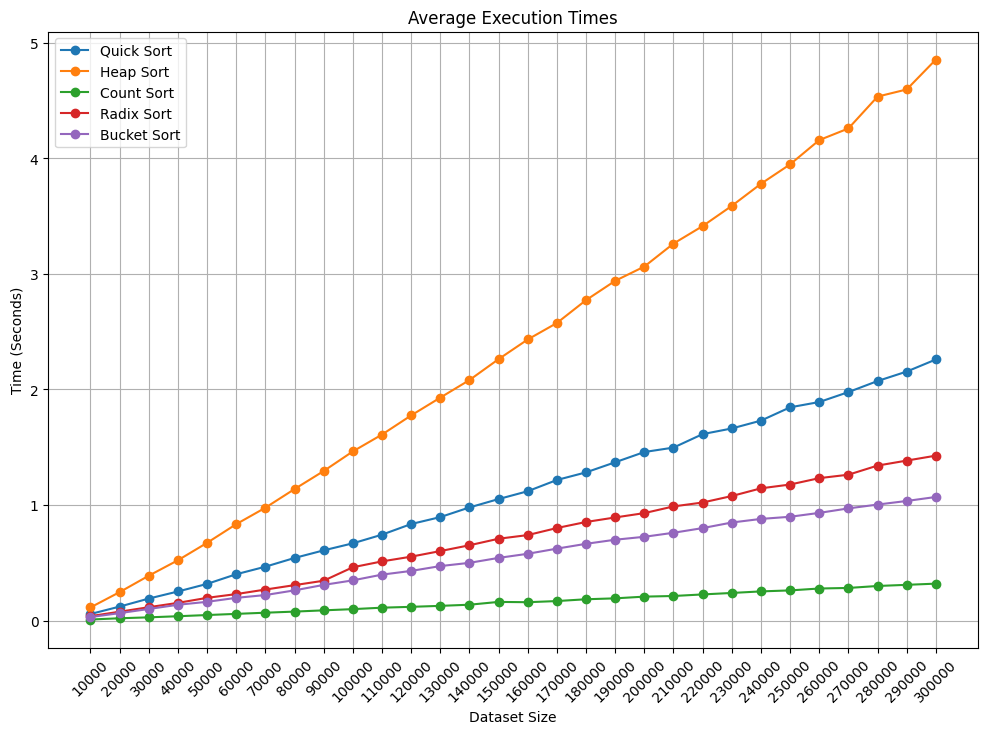

In [ ]:
# Plotting
# max_y = max(numpy.array(times)[:,1:].flatten().tolist())
plot_graph(
    times,
    "Average Execution Times",
    "Time (Seconds)",
    figsize=(12, 8),   # Custom figure size
    xticks=range(size, size*datasets+size, size)  # Custom x-ticks
    # yticks=range(0,int(max_y), 1)           # Custom y-ticks
)

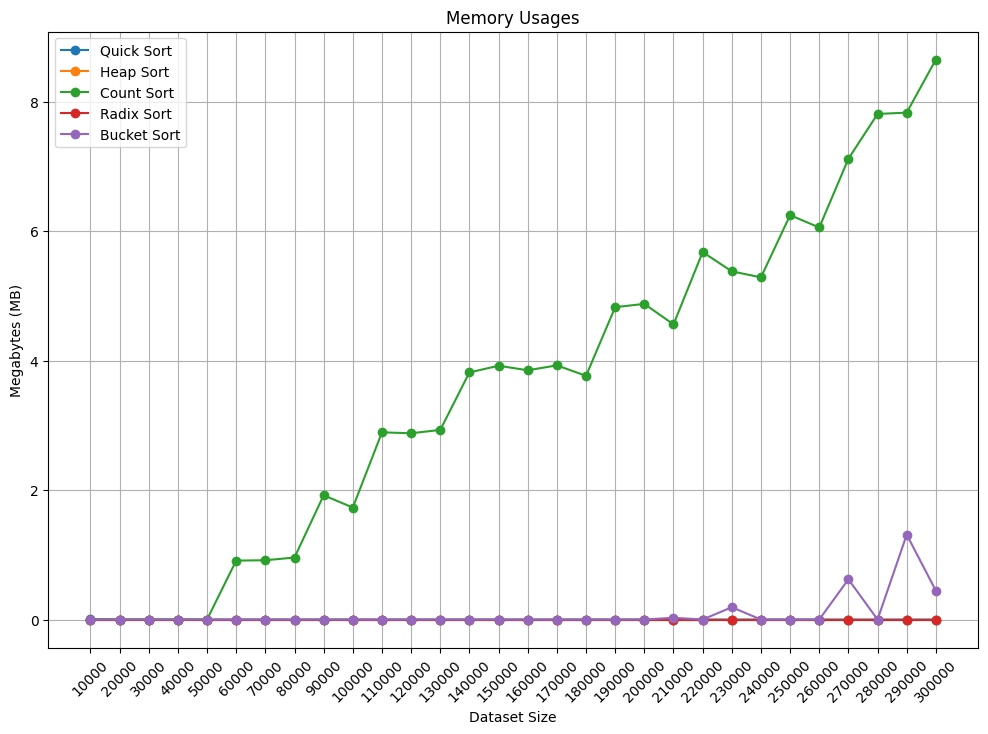

In [ ]:
# Plotting
# max_y = max(numpy.array(memory_usages)[:,1:].flatten().tolist())
plot_graph(
    memory_usages,
    "Memory Usages",
    "Megabytes (MB)",
    figsize=(12, 8),   # Custom figure size
    xticks=range(size, size*datasets+size, size)  # Custom x-ticks
    # yticks=range(0,int(max_y), 1)           # Custom y-ticks
)

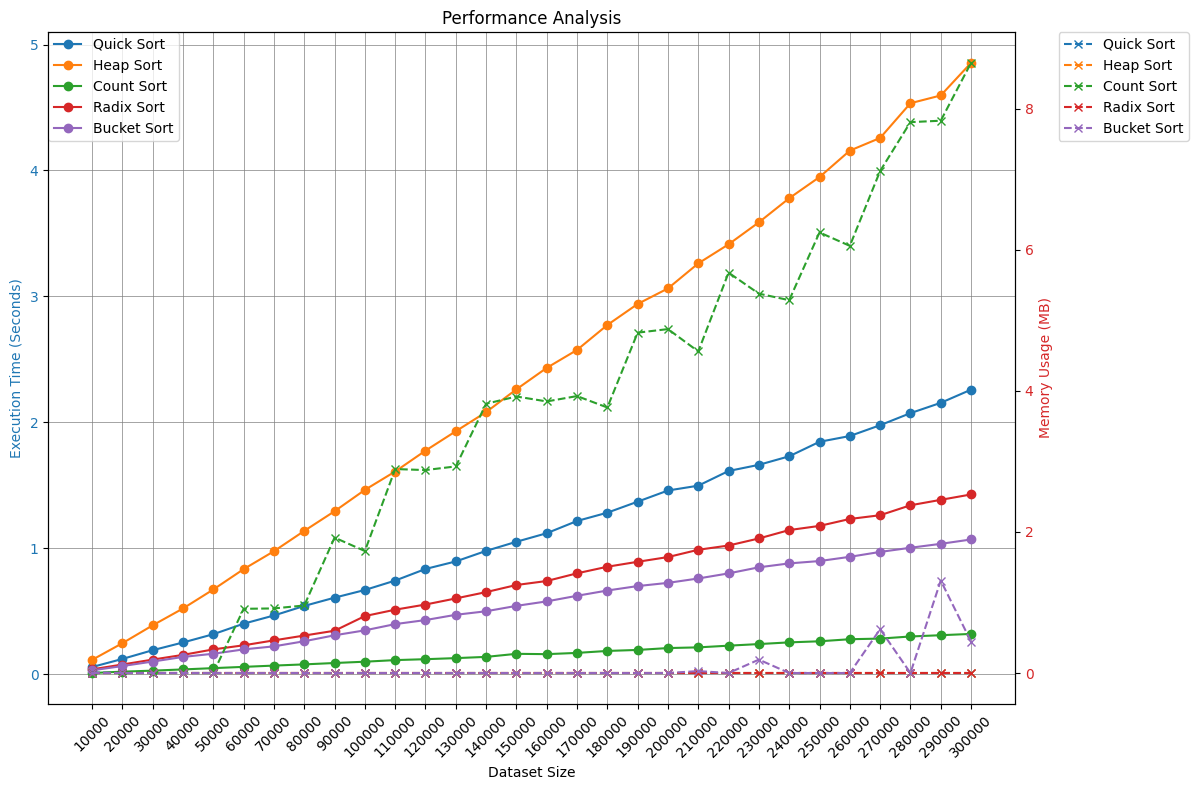

In [ ]:
# Plotting
# max_y_left = max(numpy.array(times)[:,1:].flatten().tolist())
# max_y_right = max(numpy.array(memory_usages)[:,1:].flatten().tolist())
ax = plot_dual_axis_graph(
    times,
    memory_usages,
    "Performance Analysis",
    figsize=(12, 8),  # Custom figure size
    xticks=range(size, size*datasets+size, size)  # Custom x-ticks
    # yticks_left=range(0, 10, 1)     # Custom y-ticks for left y-axis (time)
    # yticks_right=range(0, 1000, 100) # Custom y-ticks for right y-axis (memory)
)